# Etapa 1 - Entendendo o Problema

---

- Problema - Você foi contratato pela Multiplan (Administradora de Shoppings Centers) como Analista de Dados. A sua primeira tarefa é gerar insights que ajudem os administradores a ter uma visão geral sobre os visitantes do shopping, com base na renda e score.
- Quais perguntas podemos responder?

- Quais perguntas podemos responder?
    - [x]  Quantos visitantes existem no conjunto de dados disponilizado?
    - [x]  Desses visitantes quantos são masculino e feminino?
    - [x]  Como a idade se distribui entre os visitantes?
    - [x]  Como a renda se distribui entre os visitantes?
    - [x]  Como o score se distribui entre os visitantes?
    - [x]  Como as variáveis se relacionam entre si?
    - [x]  Como a idade varia em relação ao gênero?
    - [ ]  Como a renda varia em relação ao gênero?
    - [ ]  Como a renda varia em relação ao idade?

# Importando bibliotecas

In [ ]:
# Biblioteca para análise de dados
import pandas as pd

#Biblioteca para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Etapa 2 - Coletando os Dados

---

- Um profissional da área de dados realizou a extração dos dados diretamente do Banco e forneceu a você um dataset no formato csv contendo variáveis importantes e que podem ser úteis para responder essas perguntas.
    - CustomerID - Identificação do Visitante
    - Genre - Gênero do Visitante
    - Age - Idade do Visitante
    - Annual Income (kR$) - Renda anual do visitante
    - Spending Score (1-100) - Score do Visitante

In [ ]:

df = pd.read_csv('clientes_shopping.csv')
df



In [ ]:
# PEGANDOS TODAS AS INFORMAÇÕES DO DATAFRAME COMO RANGE E COLUMNS.
# VEMOS AQUI QUE NÃO HÁ DADOS FALTANTES.

df.info()

In [ ]:
# AGORA VAMOS RENOMEAR AS COLUNAS NO PANDAS PARA FACILITAR A VISUALIZAÇÃO

df.rename(columns={'CustomerID': 'Id', 'Genre': 'Genero', 'Age': 'Idade', 'Annual Income (k$)': 'Renda Anual (k$)', 'Spending Score (1-100)': 'Score'}, inplace = True)

In [ ]:
# VENDO O NÚMERO DE LINHAS E COLUNAS DE UM DATAFRAME

linhas, colunas = df.shape  # fazendo um unpack de uma tupla
print(f'número de linhas é = {linhas} e colunas é igual = {colunas} ')

## Informações estatísticas

In [ ]:
# VERIFICANDO AS INFORMAÇÕES ESTATÍSTICAS DE UM DF

df.describe().round(2)   # o round() serve para arredondadar o número de zeros para a quantidade escolhida


In [ ]:
# REMOVENDO COLUNAS DE UM DATAFRAME

df.drop(columns='Id', inplace= True )


## Verificando se há valores faltantes no dataframe

In [ ]:
df.isnull().sum()  # a soma dos valores faltantes é zero para todas as colunas

Genero              0
Idade               0
Renda Anual (k$)    0
Score               0
dtype: int64

## Duplicatas

In [ ]:
df[df.duplicated()]  # se houvesse algum valor duplicado, apareceria embaixo das colunas

,Genero,Idade,Renda Anual (k$),Score


## Gênero do visitante do shopping

In [ ]:
# 
df['Genero'].nunique()  # para verificar o número de valores únicos, no caso dois valores

2

In [ ]:
df['Genero'].unique() # fala quais são esses dois valores dentro do gênero

array(['Male', 'Female'], dtype=object)

## Trocando os nomes das linhas da coluna Genero

In [ ]:
df['Genero'] = df['Genero'].replace(['Male'], 'Masculino')
df['Genero'] = df['Genero'].replace(['Female'], 'Feminino')

In [ ]:
df.head()

## Desses visitantes quantos são do sexo masculino e quantos são do sexo feminino

In [ ]:
df['Genero'].value_counts()

Feminino     112
Masculino     88
Name: Genero, dtype: int64

## Visualizando essa informação através de um gráfico

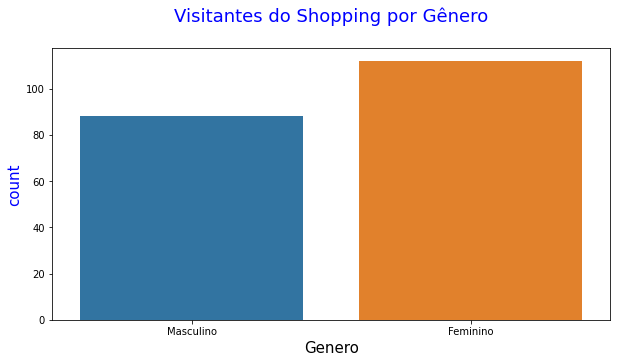

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Visitantes do Shopping por Gênero\n ', fontsize=18, color='blue')
plt.xlabel('Genero', fontsize=15)
plt.ylabel('Contagem de visitantes', fontsize=15, color='blue')
sns.countplot(df['Genero'])
plt.show()

Os clientes do sexo feminino são maiores que os do sexo masculino

## Eliminando a coluna Id do dataframe

In [ ]:
df.drop(colums='Id', inplace=True)

## Idade - Idade Do Visitante

In [ ]:
df['Idade'].nunique()

In [ ]:
df['Idade'].unique()

In [ ]:
df['Idade'].value_counts()

In [ ]:
df['Idade'].describe().round(1)

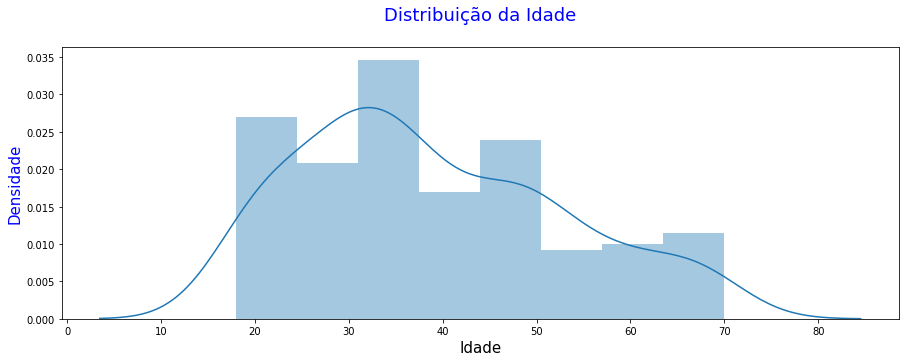

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Distribuição da Idade\n ', fontsize=18, color='blue')
plt.xlabel('Variação da Idade', fontsize=15)
plt.ylabel('Densidade', fontsize=15, color='blue')
sns.distplot(df['Idade'])
plt.show()

## Como a renda se distribui entre os visitantes

In [ ]:
df['Renda Anual (k$)'].value_counts()

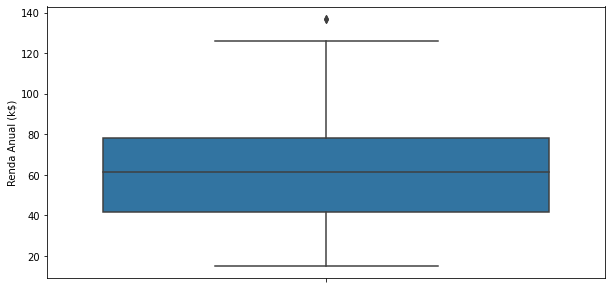

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='Renda Anual (k$)');

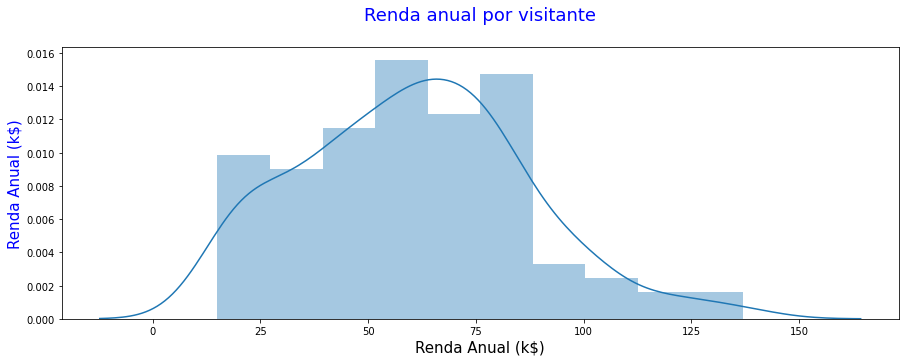

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Renda anual por visitante\n ', fontsize=18, color='blue')
plt.xlabel('Distribuição da renda', fontsize=15)
plt.ylabel('Renda Anual (k$)', fontsize=15, color='blue')
sns.distplot(df['Renda Anual (k$)'])
plt.show()

A maior parte da renda fica entre 50k e 80k

## Como o Score se distribui entre os visitantes

In [ ]:
df['Score'].nunique()

In [ ]:
df['Score'].unique()

In [ ]:
df['Score'].describe().round(1)

count    200.0
mean      50.2
std       25.8
min        1.0
25%       34.8
50%       50.0
75%       73.0
max       99.0
Name: Score, dtype: float64

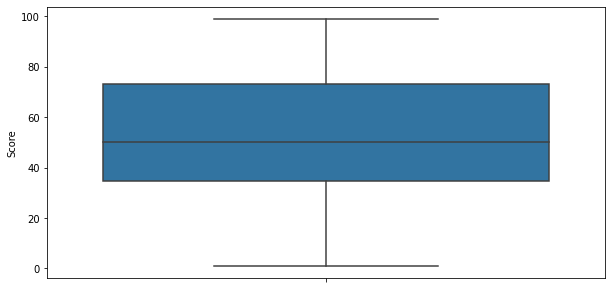

In [ ]:
# VERIFICANDO SE EXISTEM OUTLIERS - NÃO EXISTEM VALORES DISCREPANTES
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='Score');

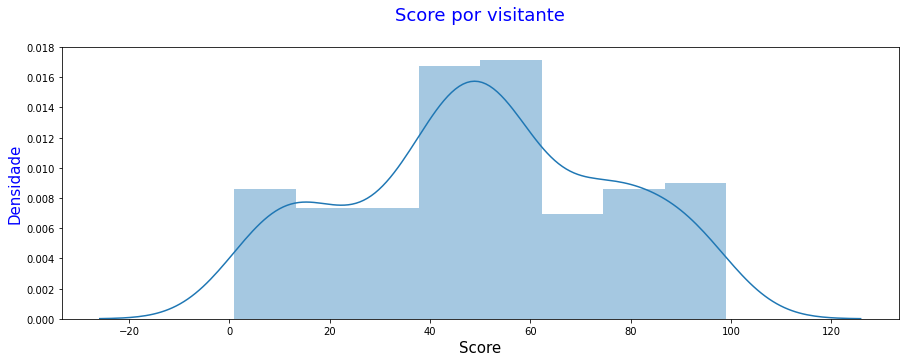

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Score por visitante\n ', fontsize=18, color='blue')
plt.xlabel('Score(1-100)', fontsize=15)
plt.ylabel('Densidade', fontsize=15, color='blue')
sns.distplot(df['Score'])
plt.show()

## A maioria das pessoas tem o Score entre 40 e 60

## Como as variáveis se relacionam entre si

In [ ]:
df.corr()

,Id,Idade,Renda Anual (k$),Score
Id,1.000000,-0.026763,0.977548,0.013835
Idade,-0.026763,1.000000,-0.012398,-0.327227
Renda Anual (k$),0.977548,-0.012398,1.000000,0.009903
Score,0.013835,-0.327227,0.009903,1.000000


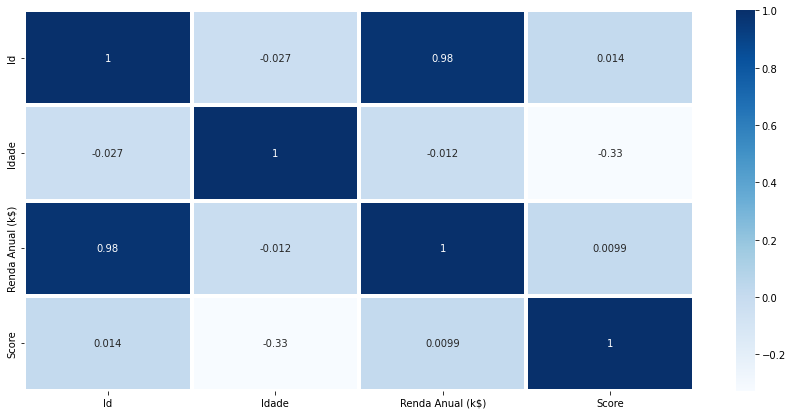

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidth=3);

## Como a idade varia em relação ao gênero

In [ ]:
df.groupby('Genero')['Idade'].mean()

Genero
Feminino     38.098214
Masculino    39.806818
Name: Idade, dtype: float64

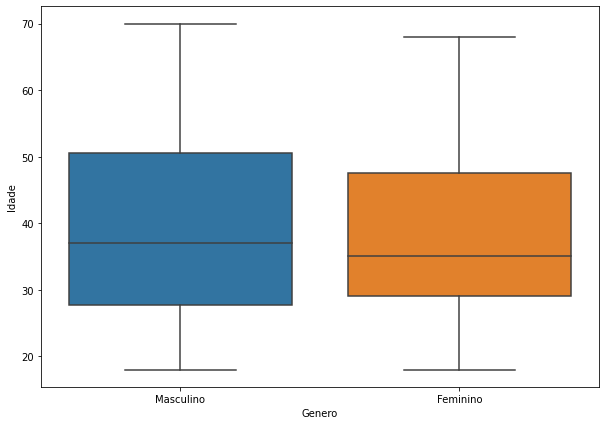

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Genero', y='Idade', data=df);
plt.show()

## Como a renda varia em relação ao gênero

In [ ]:
df.groupby('Genero')['Renda Anual (k$)'].mean()

Genero
Feminino     59.250000
Masculino    62.227273
Name: Renda Anual (k$), dtype: float64

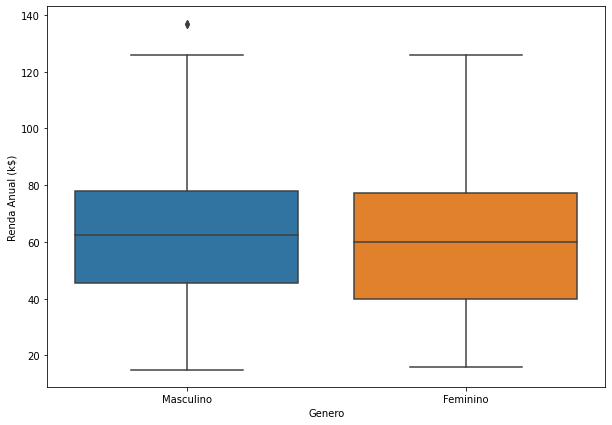

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Genero', y='Renda Anual (k$)', data=df);
plt.show()

## Como a renda varia em relação a idade

In [ ]:
df.groupby('Idade')['Renda Anual (k$)'].mean()

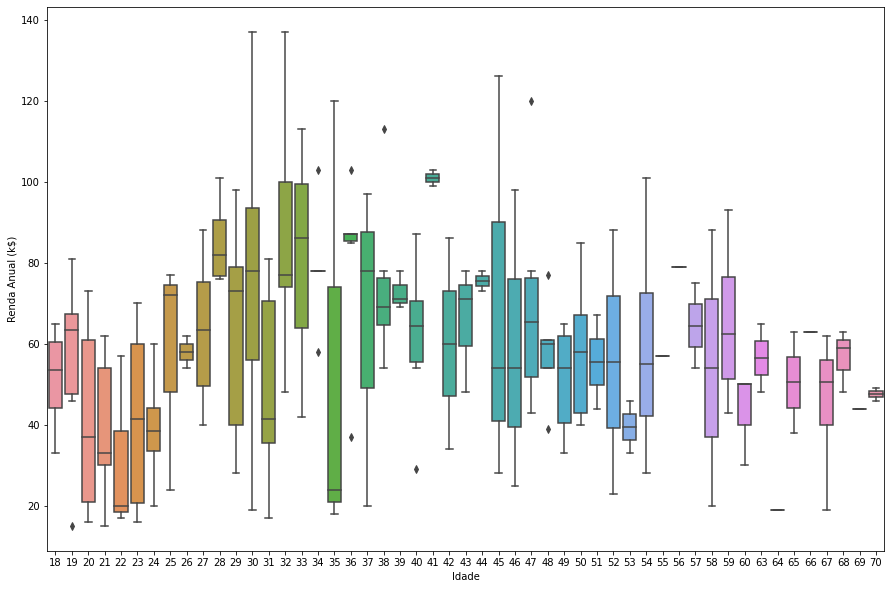

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Idade', y='Renda Anual (k$)', data=df);
plt.show()